<a href="https://colab.research.google.com/github/bhaveleena3/Python/blob/main/Assignment_Web_Scraping_and_Emotion_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perform sentimental analysis:
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-6-2e47bb25bda7>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [7]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nBest Phone,Best 5G phone at this price point and working ...,11 December 2023
1,4.0,4.0 out of 5 stars\nProduct,Good Product Tq... One plus,8 December 2023
2,4.0,4.0 out of 5 stars\nGood in this price range,Good mobile in this price range.,11 December 2023
3,4.0,4.0 out of 5 stars\nReview on same mobile,"Very nice phone 📱, i like it",7 December 2023
4,4.0,"4.0 out of 5 stars\nDurability, Charging and s...",It was really awesome and good in terms of cha...,25 November 2023
...,...,...,...,...
95,5.0,5.0 out of 5 stars\nNice,Awesome,19 November 2023
96,5.0,5.0 out of 5 stars\nGood,Good quality,25 November 2023
97,5.0,5.0 out of 5 stars\nGood,Impressive,16 November 2023
98,4.0,4.0 out of 5 stars\nGood mobile,I can rate 9/10 for this model,19 September 2023


In [8]:
df.to_csv("C:\My assignments\Data Science assignment\Text Mining\Amezon review.xlsx")

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [10]:
# load the dataset
reviews=pd.read_csv('C:\My assignments\Data Science assignment\Text Mining\Amezon review.xlsx')
reviews

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,4.0,4.0 out of 5 stars\nBest Phone,Best 5G phone at this price point and working ...,11 December 2023
1,1,4.0,4.0 out of 5 stars\nProduct,Good Product Tq... One plus,8 December 2023
2,2,4.0,4.0 out of 5 stars\nGood in this price range,Good mobile in this price range.,11 December 2023
3,3,4.0,4.0 out of 5 stars\nReview on same mobile,"Very nice phone 📱, i like it",7 December 2023
4,4,4.0,"4.0 out of 5 stars\nDurability, Charging and s...",It was really awesome and good in terms of cha...,25 November 2023
...,...,...,...,...,...
95,95,5.0,5.0 out of 5 stars\nNice,Awesome,19 November 2023
96,96,5.0,5.0 out of 5 stars\nGood,Good quality,25 November 2023
97,97,5.0,5.0 out of 5 stars\nGood,Impressive,16 November 2023
98,98,4.0,4.0 out of 5 stars\nGood mobile,I can rate 9/10 for this model,19 September 2023


In [11]:
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)


In [12]:
reviews.Rating.describe()

count    100.00000
mean       4.17000
std        0.55149
min        3.00000
25%        4.00000
50%        4.00000
75%        4.25000
max        5.00000
Name: Rating, dtype: float64

#### Number of Words

In [13]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Best 5G phone at this price point and working ...,22
1,Good Product Tq... One plus,5
2,Good mobile in this price range.,6
3,"Very nice phone 📱, i like it",7
4,It was really awesome and good in terms of cha...,30


#### Number of characters

In [14]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Best 5G phone at this price point and working ...,123.0
1,Good Product Tq... One plus,27.0
2,Good mobile in this price range.,32.0
3,"Very nice phone 📱, i like it",28.0
4,It was really awesome and good in terms of cha...,160.0


#### Average Word Length

In [15]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Best 5G phone at this price point and working ...,4.636364
1,Good Product Tq... One plus,4.600000
2,Good mobile in this price range.,4.500000
3,"Very nice phone 📱, i like it",3.142857
4,It was really awesome and good in terms of cha...,4.366667


#### Number of stopwords

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Best 5G phone at this price point and working ...,6
1,Good Product Tq... One plus,0
2,Good mobile in this price range.,2
3,"Very nice phone 📱, i like it",2
4,It was really awesome and good in terms of cha...,16


#### Number of special characters

In [17]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Best 5G phone at this price point and working ...,0
1,Good Product Tq... One plus,0
2,Good mobile in this price range.,0
3,"Very nice phone 📱, i like it",0
4,It was really awesome and good in terms of cha...,0


#### Number of numerics

In [18]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Best 5G phone at this price point and working ...,0
1,Good Product Tq... One plus,0
2,Good mobile in this price range.,0
3,"Very nice phone 📱, i like it",0
4,It was really awesome and good in terms of cha...,0


#### Number of Uppercase words

In [19]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Best 5G phone at this price point and working ...,1
1,Good Product Tq... One plus,0
2,Good mobile in this price range.,0
3,"Very nice phone 📱, i like it",0
4,It was really awesome and good in terms of cha...,0


In [20]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [21]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    West Of phone at this price point and working ...
1                           Good Product Q... One plus
2                     Good mobile in this price range.
3                         Very nice phone 📱, i like it
4    It was really awesome and good in terms of cha...
Name: Review, dtype: object

In [22]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     11
1      8
2     11
3      7
4     25
      ..
95    19
96    25
97    16
98    19
99    13
Name: Review_Date, Length: 100, dtype: object 
 0      December
1      December
2      December
3      December
4      November
        ...    
95     November
96     November
97     November
98    September
99    September
Name: Review_Date, Length: 100, dtype: object 
 0     2023
1     2023
2     2023
3     2023
4     2023
      ... 
95    2023
96    2023
97    2023
98    2023
99    2023
Name: Review_Date, Length: 100, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [23]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,11,December,2023
1,8,December,2023
2,11,December,2023
3,7,December,2023
4,25,November,2023
...,...,...,...
95,19,November,2023
96,25,November,2023
97,16,November,2023
98,19,September,2023


In [24]:
df.Month.value_counts()

October      34
November     32
December     20
September    10
August        2
January       1
February      1
Name: Month, dtype: int64

### Change 'month' from words to numbers for easier analysis

In [25]:
order={'Month':{'August':2,'September':3,'October':4,'November':5,'December':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,6
1,6
2,6
3,6
4,5
...,...
95,5
96,5
97,5
98,3


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    object 
 5   Month        100 non-null    object 
 6   Year         100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [27]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    int64  
 5   Month        100 non-null    object 
 6   Year         100 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB


### Dropping the Original Columns after splitting the data

In [28]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,4.0,4.0 out of 5 stars\nBest Phone,Best 5G phone at this price point and working ...,11,6,2023
1,4.0,4.0 out of 5 stars\nProduct,Good Product Tq... One plus,8,6,2023
2,4.0,4.0 out of 5 stars\nGood in this price range,Good mobile in this price range.,11,6,2023
3,4.0,4.0 out of 5 stars\nReview on same mobile,"Very nice phone 📱, i like it",7,6,2023
4,4.0,"4.0 out of 5 stars\nDurability, Charging and s...",It was really awesome and good in terms of cha...,25,5,2023


In [29]:
df1

,Rating,Title,Review,Date,Month,Year
0,4.0,4.0 out of 5 stars\nBest Phone,Best 5G phone at this price point and working ...,11,6,2023
1,4.0,4.0 out of 5 stars\nProduct,Good Product Tq... One plus,8,6,2023
2,4.0,4.0 out of 5 stars\nGood in this price range,Good mobile in this price range.,11,6,2023
3,4.0,4.0 out of 5 stars\nReview on same mobile,"Very nice phone 📱, i like it",7,6,2023
4,4.0,"4.0 out of 5 stars\nDurability, Charging and s...",It was really awesome and good in terms of cha...,25,5,2023
...,...,...,...,...,...,...
95,5.0,5.0 out of 5 stars\nNice,Awesome,19,5,2023
96,5.0,5.0 out of 5 stars\nGood,Good quality,25,5,2023
97,5.0,5.0 out of 5 stars\nGood,Impressive,16,5,2023
98,4.0,4.0 out of 5 stars\nGood mobile,I can rate 9/10 for this model,19,3,2023


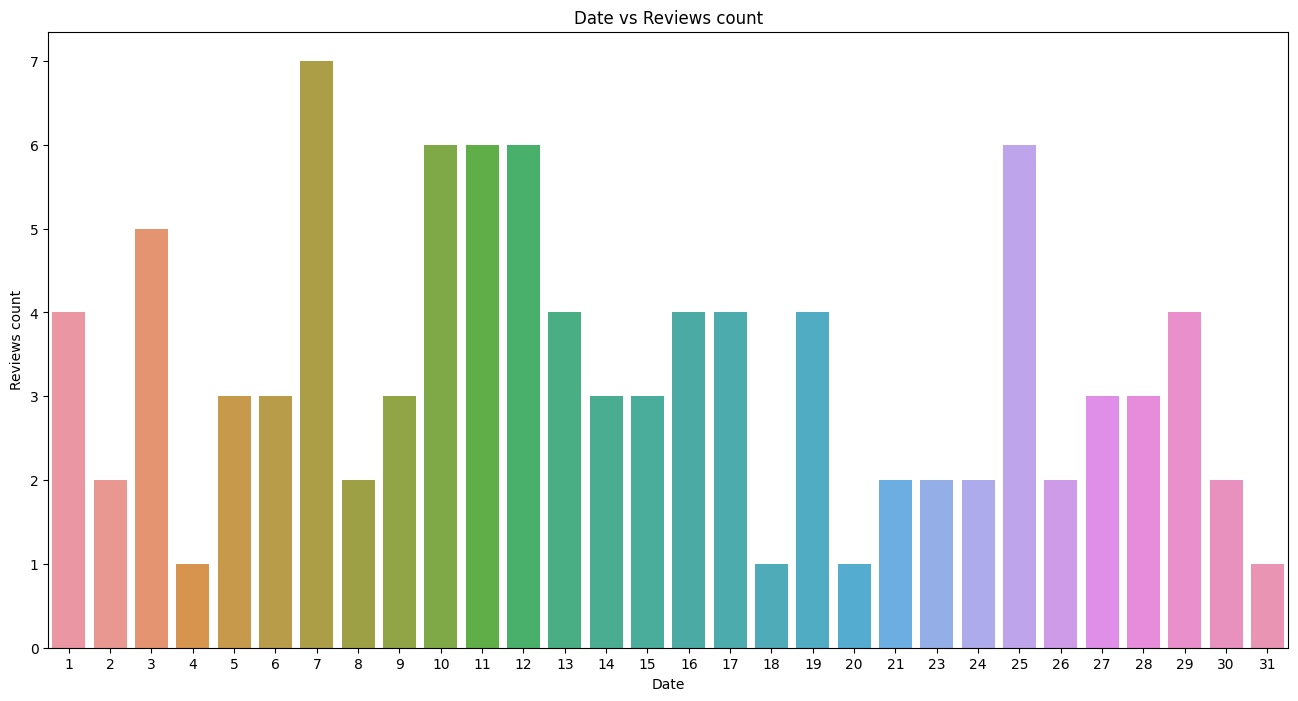

In [30]:
#Creating a dataframe
dayreview = pd.DataFrame(df1.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

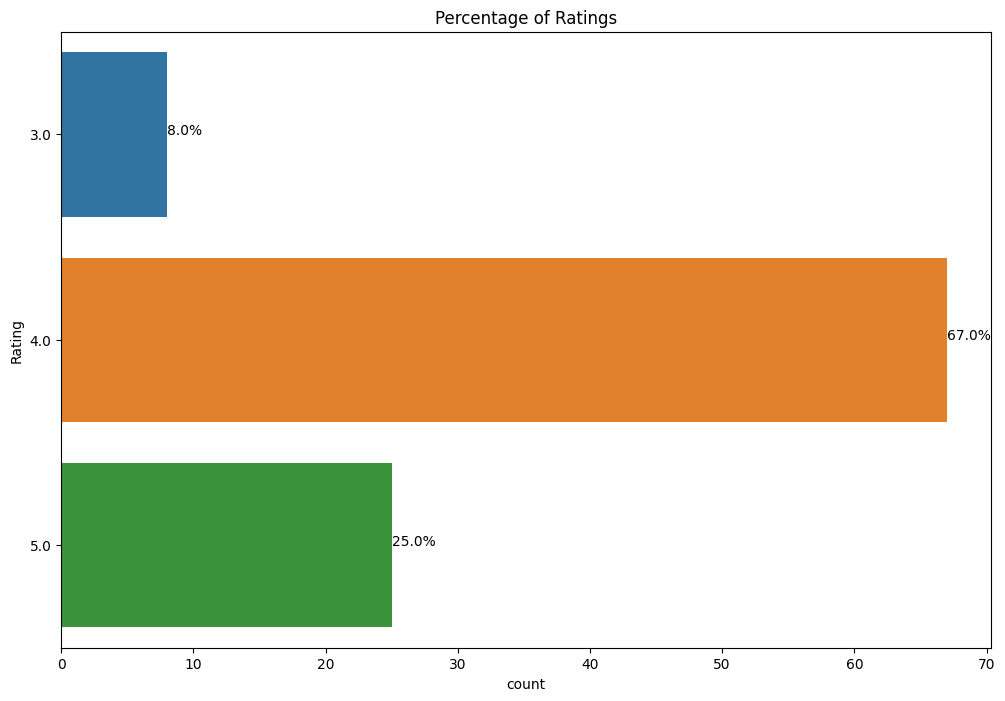

In [31]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [40]:
# for Sentiment analysis
data = df1[['Review']]
data

,Review
0,Best 5G phone at this price point and working ...
1,Good Product Tq... One plus
2,Good mobile in this price range.
3,"Very nice phone 📱, i like it"
4,It was really awesome and good in terms of cha...
...,...
95,Awesome
96,Good quality
97,Impressive
98,I can rate 9/10 for this model


In [41]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [42]:
data

,Review
0,best 5g phone price point working soothe camer...
1,good product tq... one plus
2,good mobile price range.
3,"very nice phone 📱, like"
4,it really awesome good terms charging durabili...
...,...
95,awesome
96,good quality
97,impressive
98,i rate 9/10 model


In [44]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [45]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...
1,good product tq one plus,Good Product Tq... One plus
2,good mobile price range,Good mobile in this price range.
3,nice phone like,"Very nice phone 📱, i like it"
4,really awesome good term charging durability t...,It was really awesome and good in terms of cha...


In [46]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [47]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...
1,good product tq one plus,Good Product Tq... One plus
2,good mobile price range,Good mobile in this price range.
3,nice phone like,"Very nice phone 📱, i like it"
4,really awesome good term charging durability t...,It was really awesome and good in terms of cha...
5,k nice phonecamera markbut okbecause one plus ...,Under 20k nice phoneCamera not up to the markB...
6,good,Good
7,good mobile,Good mobile
8,hang bit,But hangs a bit
9,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...


#### <a id='7Ab'>b. Removing links (http | https)</a>

In [48]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...
1,good product tq one plus,Good Product Tq... One plus
2,good mobile price range,Good mobile in this price range.
3,nice phone like,"Very nice phone 📱, i like it"
4,really awesome good term charging durability t...,It was really awesome and good in terms of cha...
5,k nice phonecamera markbut okbecause one plus ...,Under 20k nice phoneCamera not up to the markB...
6,good,Good
7,good mobile,Good mobile
8,hang bit,But hangs a bit
9,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...


In [49]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...
1,good product tq one plus,Good Product Tq... One plus
2,good mobile price range,Good mobile in this price range.
3,nice phone like,"Very nice phone 📱, i like it"
4,really awesome good term charging durability t...,It was really awesome and good in terms of cha...
5,k nice phonecamera markbut okbecause one plus ...,Under 20k nice phoneCamera not up to the markB...
6,good,Good
7,good mobile,Good mobile
8,hang bit,But hangs a bit
9,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...


In [50]:
# dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...
1,good product tq one plus,Good Product Tq... One plus
2,good mobile price range,Good mobile in this price range.
3,nice phone like,"Very nice phone 📱, i like it"
4,really awesome good term charging durability t...,It was really awesome and good in terms of cha...
5,k nice phonecamera markbut okbecause one plus ...,Under 20k nice phoneCamera not up to the markB...
6,good,Good
7,good mobile,Good mobile
8,hang bit,But hangs a bit
9,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...


In [51]:
#Resetting index
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...
1,good product tq one plus,Good Product Tq... One plus
2,good mobile price range,Good mobile in this price range.
3,nice phone like,"Very nice phone 📱, i like it"
4,really awesome good term charging durability t...,It was really awesome and good in terms of cha...
5,k nice phonecamera markbut okbecause one plus ...,Under 20k nice phoneCamera not up to the markB...
6,good,Good
7,good mobile,Good mobile
8,hang bit,But hangs a bit
9,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...


In [57]:
# Removing Punctuations, numbers and Special Characters
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [54]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...
1,good product tq one plus,Good Product Tq... One plus
2,good mobile price range,Good mobile in this price range.
3,nice phone like,"Very nice phone 📱, i like it"
4,really awesome good term charging durability t...,It was really awesome and good in terms of cha...
5,k nice phonecamera markbut okbecause one plus ...,Under 20k nice phoneCamera not up to the markB...
6,good,Good
7,good mobile,Good mobile
8,hang bit,But hangs a bit
9,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...


#### <a id='7Ag'>g. Function to remove emoji</a>

In [58]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [59]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...
1,good product tq one plus,Good Product Tq... One plus
2,good mobile price range,Good mobile in this price range.
3,nice phone like,"Very nice phone 📱, i like it"
4,really awesome good term charging durability t...,It was really awesome and good in terms of cha...
5,k nice phonecamera markbut okbecause one plus ...,Under 20k nice phoneCamera not up to the markB...
6,good,Good
7,good mobile,Good mobile
8,hang bit,But hangs a bit
9,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...


In [63]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...,"[best, g, phone, price, point, working, soothe..."
1,good product tq one plus,Good Product Tq... One plus,"[good, product, tq, one, plus]"
2,good mobile price range,Good mobile in this price range.,"[good, mobile, price, range]"
3,nice phone like,"Very nice phone 📱, i like it","[nice, phone, like]"
4,really awesome good term charging durability t...,It was really awesome and good in terms of cha...,"[really, awesome, good, term, charging, durabi..."
5,k nice phonecamera markbut okbecause one plus ...,Under 20k nice phoneCamera not up to the markB...,"[k, nice, phonecamera, markbut, okbecause, one..."
6,good,Good,[good]
7,good mobile,Good mobile,"[good, mobile]"
8,hang bit,But hangs a bit,"[hang, bit]"
9,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...,"[good, stylish, phone, compared, phone, functi..."


In [64]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

#### <a id='7Ai'>i. Tokenize *'Clean_Reviews'*</a>  

In [66]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['good', 'product', 'tq', 'one', 'plus'])

In [67]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [best, g, phone, price, point, working, soothe...
1                       [good, product, tq, one, plus]
2                         [good, mobile, price, range]
3                                  [nice, phone, like]
4    [really, awesome, good, term, charging, durabi...
5    [k, nice, phonecamera, markbut, okbecause, one...
6                                               [good]
7                                       [good, mobile]
8                                          [hang, bit]
9    [good, stylish, phone, compared, phone, functi...
Name: Clean_Reviews, dtype: object

#### <a id='7Ai'>j. Converting words to Stemmer</a>

In [68]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [69]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,best g phone price point work sooth camera dis...
1,good product tq one plus
2,good mobil price rang
3,nice phone like
4,realli awesom good term charg durabl term came...
...,...
93,awesom
94,good qualiti
95,impress
96,rate model


In [71]:
#  Converting words to Lemma
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,best g phone price point working soothe camera...
1,good product tq one plus
2,good mobile price range
3,nice phone like
4,really awesome good term charging durability t...
...,...
93,awesome
94,good quality
95,impressive
96,rate model


In [72]:
# Applying bag of Words without N grams
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [73]:
print(cv.vocabulary_)

{'best': 60, 'phone': 427, 'price': 451, 'point': 440, 'working': 640, 'soothe': 539, 'camera': 85, 'display': 155, 'battery': 56, 'backup': 48, 'also': 16, 'good': 233, 'body': 71, 'srat': 547, 'quality': 466, 'product': 459, 'tq': 588, 'one': 400, 'plus': 437, 'mobile': 359, 'range': 473, 'nice': 383, 'like': 319, 'really': 479, 'awesome': 42, 'term': 571, 'charging': 96, 'durability': 162, 'expectation': 183, 'rest': 492, 'thing': 575, 'perfectly': 421, 'phonecamera': 428, 'markbut': 341, 'okbecause': 397, 'hang': 250, 'bit': 67, 'stylish': 558, 'compared': 118, 'function': 215, 'iphone': 277, 'india': 273, 'poor': 442, 'population': 443, 'foreign': 206, 'country': 135, 'think': 577, 'people': 419, 'able': 4, 'buy': 83, 'brand': 74, 'minor': 354, 'problem': 456, 'consumes': 131, 'fast': 192, 'well': 629, 'work': 639, 'approximately': 29, 'hour': 262, 'charge': 93, 'day': 143, 'loss': 329, 'early': 163, 'otherwise': 408, 'suggest': 560, 'indian': 274, 'requesting': 491, 'oneplus': 40

In [76]:
print(tweetscv.toarray()[100:200])

[]


### <a id='8Ba'>B. **CountVectorizer with N-grams (Bigrams & Trigrams)**</a>

In [77]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/98 [00:00<?, ?it/s]

In [78]:
corpus[3]

'nice phone like'

In [79]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [99]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
X.shape

(98, 3194)

In [84]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [97]:
p=X.astype('str')
p

array([['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ...,
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0']], dtype='<U21')

In [107]:
cv.get_feature_names_out()

array(['aa', 'aa gya', 'aa gya tha', ..., 'yt', 'yt heat', 'yt heat issu'],
      dtype=object)

In [108]:
count_df = pd.DataFrame(X,columns=cv.get_feature_names_out())
count_df

,aa,aa gya,aa gya tha,aap,aap latest,aap latest phone,aap set,aap set chang,aapko,aapko one,...,yet aspect,yet aspect ok,youtub,youtub instagram,youtub instagram facebook,youtub recommend,youtub recommend get,yt,yt heat,yt heat issu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <a id='8Ca'> **TF-IDF Vectorizer**</a>

In [100]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/98 [00:00<?, ?it/s]

In [102]:
corpus[4]

'realli awesom good term charg durabl term camera expect rest thing work perfectli'

In [103]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [104]:
X.shape

(98, 3194)

In [106]:
tfidf_v.get_feature_names_out()[:20]

array(['aa', 'aa gya', 'aa gya tha', 'aap', 'aap latest',
       'aap latest phone', 'aap set', 'aap set chang', 'aapko',
       'aapko one', 'aapko one plu', 'ab', 'ab ye', 'ab ye bhi', 'abl',
       'abl buy', 'abl buy phone', 'acha', 'acha comfort',
       'acha comfort bhi'], dtype=object)

In [109]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [110]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,aa,aa gya,aa gya tha,aap,aap latest,aap latest phone,aap set,aap set chang,aapko,aapko one,...,yet aspect,yet aspect ok,youtub,youtub instagram,youtub instagram facebook,youtub recommend,youtub recommend get,yt,yt heat,yt heat issu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <a id='8Da'> Named Entity Recognition (NER)</a>

In [111]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'best g phone price point working soothe camera display battery backup also good body srat quality good product tq one plus good mobile price range nice phone like really awesome good term charging durability term camera expectation rest thing working perfectly k nice phonecamera markbut okbecause one plus price good good mobile hang bit good stylish phone compared phone function like iphone india poor population compared foreign country think people india able buy phone brand one plus minor problem phone consumes battery fast rest battery working well work approximately hour charge charge phone day one problem battery loss early otherwise good phone suggest indian buy phone requesting oneplus increase rate phone want buy buy end emi segesst one plus rate equal great indian festival baught one fact showed oneplus neighbour impressed want buy phone budget k overall full mark oneplus great product gallary oneplus thank value money camera good nightbattery performing mahother thing good e

In [112]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [113]:
for token in doc_block[:50]:
    print(token,token.pos_)

best ADJ
g PROPN
phone NOUN
price NOUN
point NOUN
working VERB
soothe PROPN
camera NOUN
display NOUN
battery NOUN
backup NOUN
also ADV
good ADJ
body NOUN
srat NOUN
quality NOUN
good ADJ
product NOUN
tq ADP
one NUM
plus CCONJ
good ADJ
mobile ADJ
price NOUN
range NOUN
nice ADJ
phone NOUN
like ADP
really ADV
awesome ADJ
good ADJ
term NOUN
charging VERB
durability NOUN
term NOUN
camera NOUN
expectation NOUN
rest NOUN
thing NOUN
working VERB
perfectly ADV
k PROPN
nice ADJ
phonecamera NOUN
markbut PROPN
okbecause VERB
one NUM
plus CCONJ
price NOUN
good ADJ


In [114]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['hanging', 'price', 'quality', 'purchased', 'oneplus', 'phone', 'delivery', 'time', 'phone', 'g', 'camera', 'version', 'speed', 'come', 'charging', 'adapter', 'battery', 'good', 'need', 'improvement', 'app', 'management', 'health', 'found', 'using', 'phone', 'need', 'performance', 'improvement', 'phone', 'uioverall', 'option', 'product', 'packed', 'delivered', 'day', 'colour', 'phone', 'performance', 'picture', 'quality', 'lighting', 'lighting', 'give', 'image', 'usage', 'know', 'plastic', 'back', 'cover', 'feel', 'phone', 'hand', 'buy', 'thank', 'try', 'keep', 'review', 'review', 'perspective', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'complaining', 'device', 'price', 'use', 'tool', 'camera', 'con', 'software', 'feature', 'make', 'speed', 'power', 'run', 'apps', 'people', 'use', 'issue', 'build', 'quality', 'given', 'going', 'use', 'sort', 'case', 'see', 'battery', 'need', 'charge', 'day', 'browse', 'internet', 'use']


In [116]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,56
1,camera,33
2,battery,20
3,quality,20
4,price,15
5,use,12
6,day,10
7,oneplus,10
8,performance,10
9,product,9


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

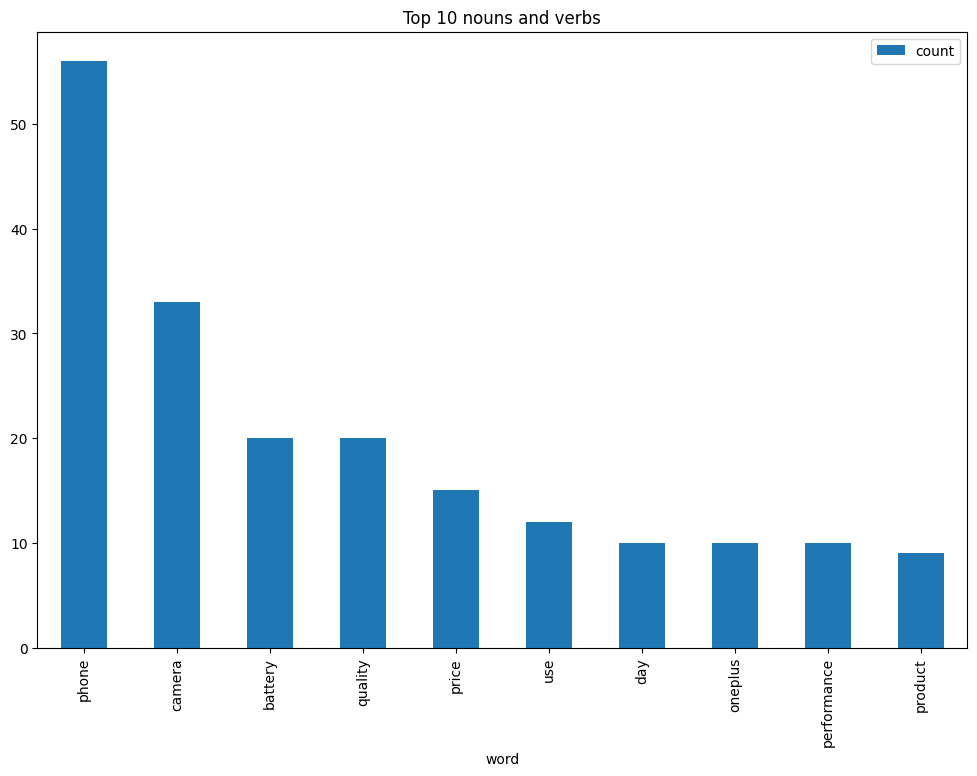

In [117]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [118]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [119]:
# 1 way SentimentIntensityAnalyzer
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way Text Blob
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [120]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,92
neg,6


In [121]:
dataframe.Clean_Reviews[8]

'hang bit'

In [122]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [131]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,best g phone price point working soothe camera...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp..."
1,good product tq one plus,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou..."
2,good mobile price range,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp..."
3,nice phone like,"{'neg': 0.0, 'neu': 0.159, 'pos': 0.841, 'comp..."
4,really awesome good term charging durability t...,"{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'comp..."


In [132]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,best g phone price point working soothe camera...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.8625
1,good product tq one plus,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.4404
2,good mobile price range,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404
3,nice phone like,"{'neg': 0.0, 'neu': 0.159, 'pos': 0.841, 'comp...",0.6486
4,really awesome good term charging durability t...,"{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'comp...",0.9148


In [133]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,best g phone price point working soothe camera...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.8625,Positive
1,good product tq one plus,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.4404,Positive
2,good mobile price range,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,Positive
3,nice phone like,"{'neg': 0.0, 'neu': 0.159, 'pos': 0.841, 'comp...",0.6486,Positive
4,really awesome good term charging durability t...,"{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'comp...",0.9148,Positive
...,...,...,...,...
93,awesome,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,Positive
94,good quality,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive
95,impressive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5106,Positive
96,rate model,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [134]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



![newplot%20%281%29.png](attachment:newplot%20%281%29.png)

<Axes: xlabel='sentiment', ylabel='count'>

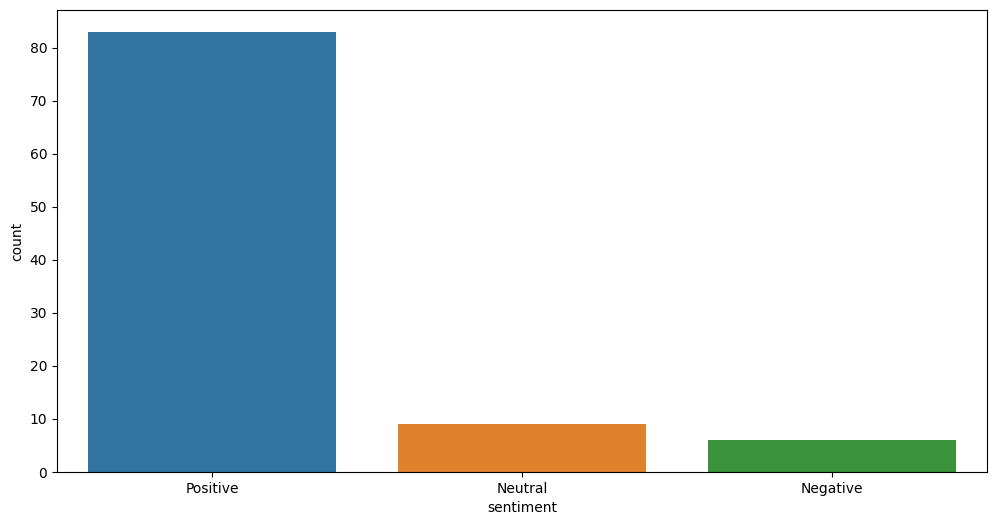

In [135]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<ipython-input-138-b3e96d257d7c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='compound', ylabel='Density'>

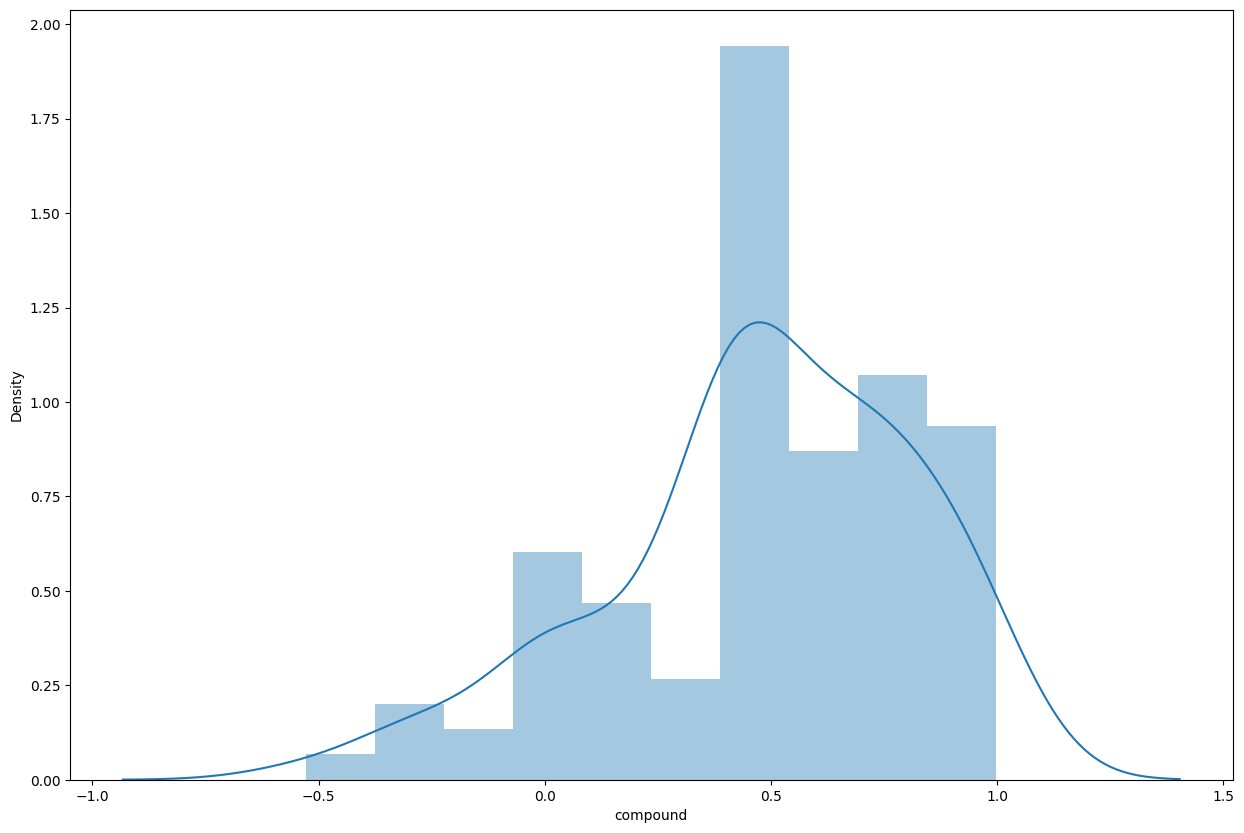

In [138]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

### <a id='10Ab'>b. Using TextBlob</a>

In [142]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,97
neg,1


In [144]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...,0.450000,0.85
1,good product tq one plus,Good Product Tq... One plus,0.600000,0.70
2,good mobile price range,Good mobile in this price range.,0.600000,0.70
3,nice phone like,"Very nice phone 📱, i like it",1.000000,0.60
4,really awesome good term charging durability t...,It was really awesome and good in terms of cha...,0.866667,0.90


Text(0, 0.5, 'Subjectivity')

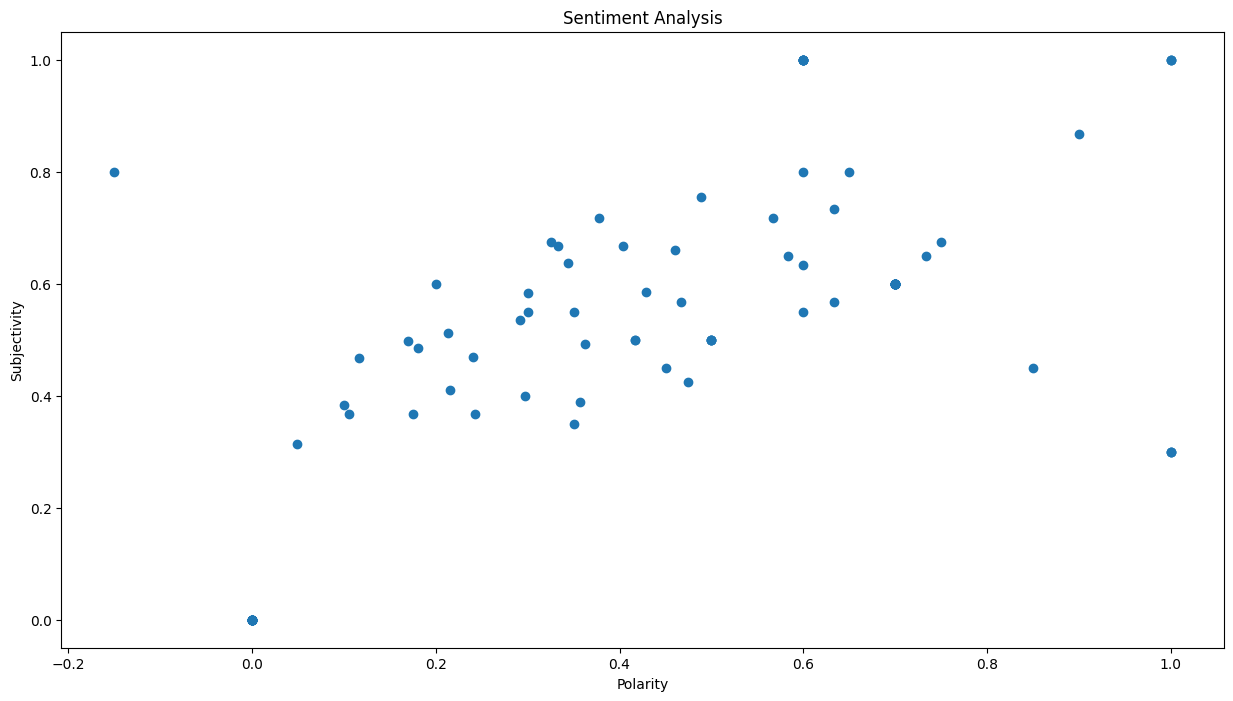

In [145]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [150]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

![newplot.png](attachment:newplot.png)

##### *NLTK* gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

In [151]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("/content/C:\My assignments\Data Science assignment\Text Mining\Amezon review.xlsx",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...,0.450000,0.85,pos
1,good product tq one plus,Good Product Tq... One plus,0.600000,0.70,pos
2,good mobile price range,Good mobile in this price range.,0.600000,0.70,pos
3,nice phone like,"Very nice phone 📱, i like it",1.000000,0.60,pos
4,really awesome good term charging durability t...,It was really awesome and good in terms of cha...,0.866667,0.90,pos


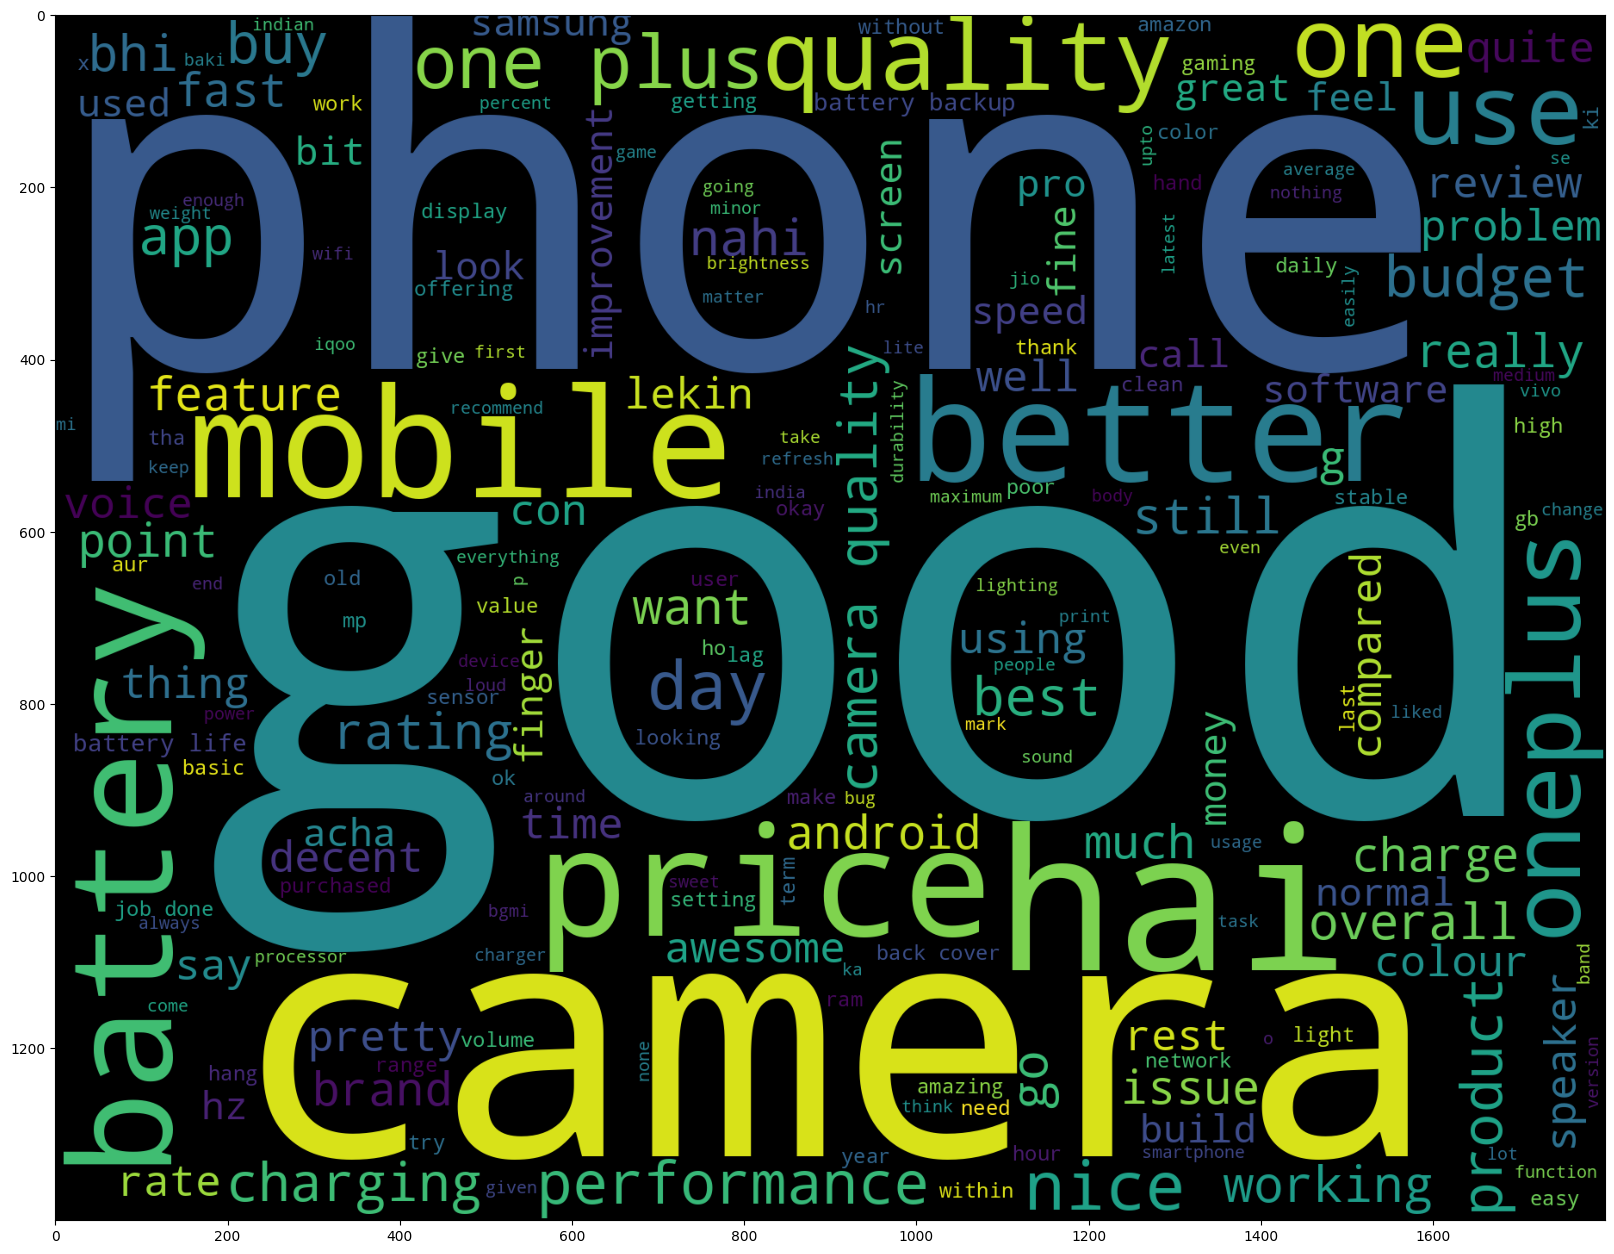

In [153]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,20))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [154]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

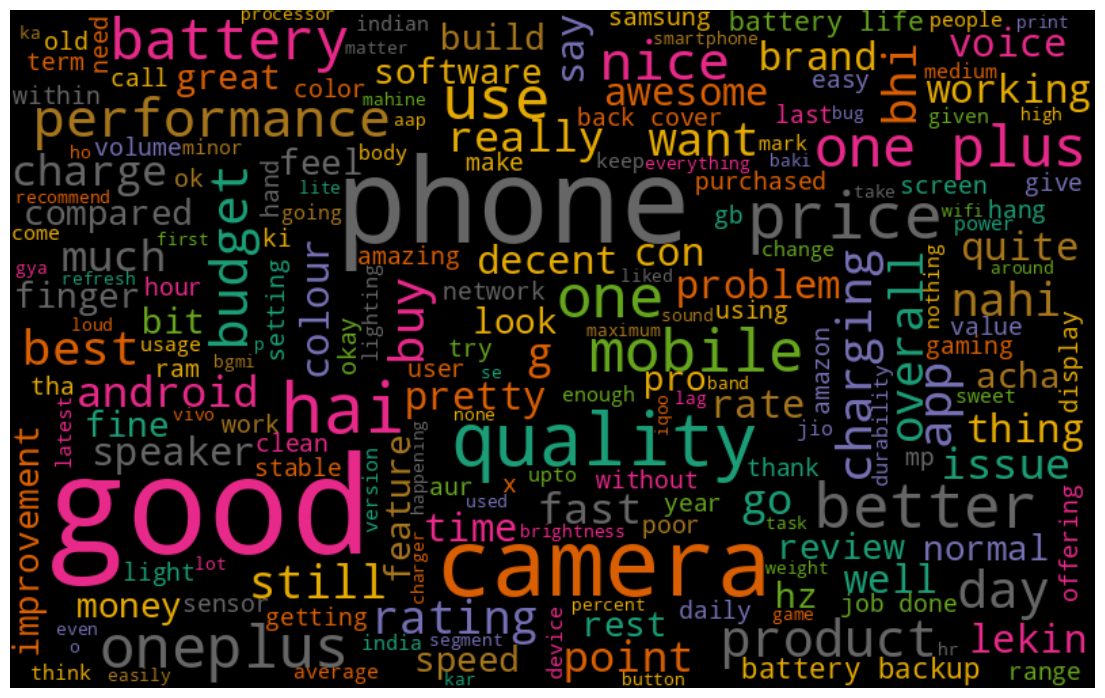

In [155]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### <a id='11B'>B. Most common words in negative Review</a>

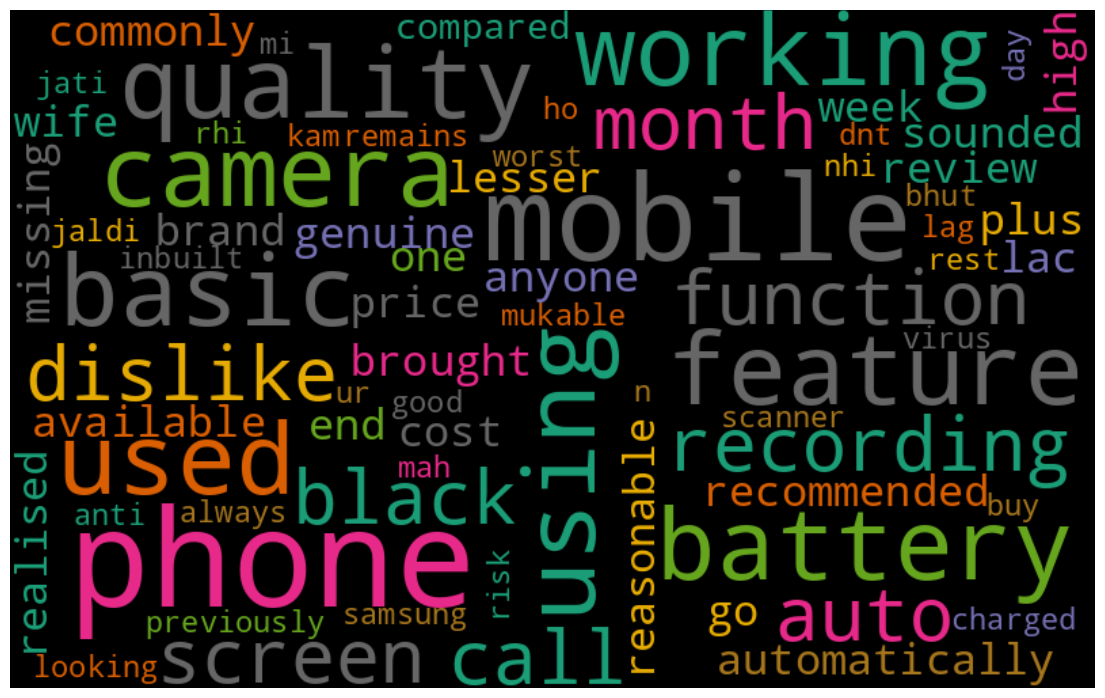

In [156]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)